# PODATKI O AZIJSKIH STRIPIH ZADNJIH 10IH LET S STRANI MANGAFIRE

Odlocil sem se analizirati podatke o stripih s spletne strani https://mangafire.to/home, 
ki jo najpogosteje uporabljam. Da bi nekoliko omejil kolicino podatkov, sem se odlocil omejiti na tiste, 
ki so izhajali v zadnjih desetih letih - priblizno 25 000 stripov. Za vsak strip sem zbral naslednje 
podatke: naslov, vrsta, stevilo poglavij ter leto izida zadnjega poglavja.

In [4]:
import pandas as pd
import matplotlib as plt

pd.set_option("display.max_rows", 10)
%matplotlib inline
stripi = pd.read_csv("podatki.csv")


In [5]:
stripi

,ime,vrsta,poglavja,datum
0,Fuchou Airen,Manhua,17.0,2024
1,Hiiragi-san is a Little Careless.,Manga,39.0,2024
2,"The Guy She Was Interested in Wasn""t a Guy at All",Manga,97.0,2024
3,I have 90 billion licking gold,Manhua,316.0,2024
4,Story of the Side to Expel,Manga,26.0,2024
...,...,...,...,...
24145,Chi: On the Movements of the Earth,Manga,62.0,2022
24146,The Liminal Zone,Manga,4.0,2022
24147,Sensor,Manga,7.0,2022
24148,Light Again,One_shot,1.0,2022


## ANALIZA PODATKOV

Zanimali so me naslednji rezultati: katerih stripov je izslo najvec in koliko katerih glede na vrsto, 
povprecno stevilo poglavij za vsako vrsto ter vsota stevila poglavij tistih, ki so se zakljucili v istem letu. Najprej si oglejmo koliko stripov posamezne vrste smo zajeli.

<Axes: xlabel='vrsta'>

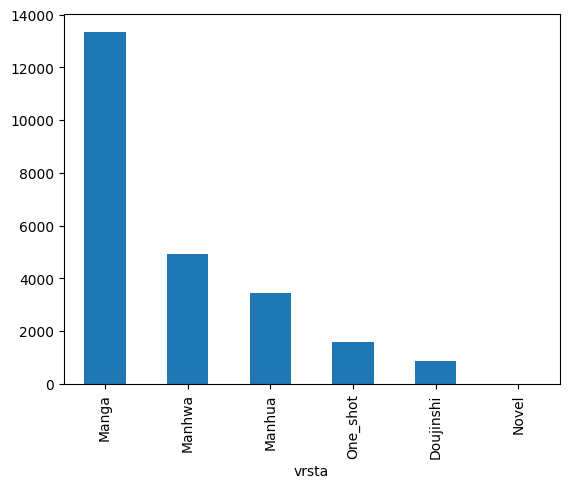

In [6]:
#vrste = stripi[["vrsta"]]
#filter_vrste = stripi["vrsta"] == "Manga"
#mange = stripi[filter_vrste]
stevec = stripi["vrsta"].value_counts()
stevec
stevec.plot.bar()

Sedaj poglejmo povprecno dolzino (v poglavjih) zajetih stripov glede na njihovo vrsto:

In [7]:
vrste = stripi[["vrsta"]]
filter_vrste = stripi["vrsta"] == "Manga"
mange = stripi[filter_vrste]
poglavja = stripi.sort_values("poglavja", ascending=False)
poglavja

,ime,vrsta,poglavja,datum
16558,"Yamakusa Yuu Today""s Doodle",Manga,20220816.0,2024
23049,TEKNO,Manga,10000.0,2023
1620,Martial Peak (Colored),Manhua,3753.0,2024
143,Fate/Grand Order - Daily Chaldea (Doujinshi),Doujinshi,1928.0,2024
472,Principles of Heavens: Zen’s Cultivation of Im...,Manhua,1217.0,2024
...,...,...,...,...
14530,Seiryuu no Magoi,One_shot,0.0,2024
21222,LAND ESCAPE (Nishimura Ryuu),One_shot,0.0,2023
21223,Osananajimi ni Kisu shichatta Hanashi,One_shot,0.0,2023
21224,Shioichi-san the Female Mosquito,One_shot,0.0,2023


<Axes: xlabel='vrsta', ylabel='povprecno stevilo poglavij'>

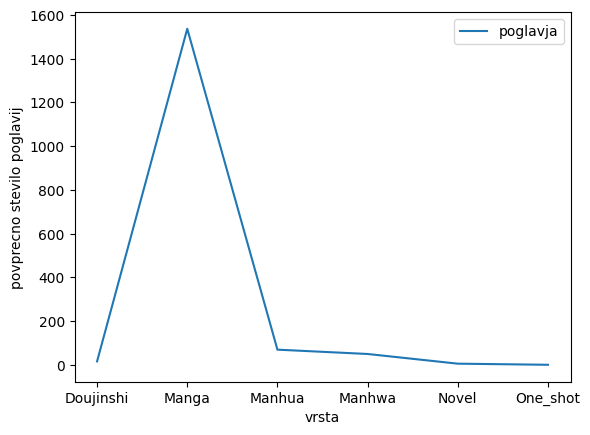

In [8]:
filter = stripi[["vrsta", "poglavja"]]
filter.groupby("vrsta").mean().plot(ylabel = "povprecno stevilo poglavij")

Opazimo, da podatki niso najbolj reprezentativni, saj so nekateri stripi le vidni na spletni strani, a dejansko nimajo objavljenih poglavij in tako znizujejo povprecje, najdemo pa tudi zbirko skic ilustracij, ki do danes vsebuje ze 20 miljonov risb. Za boljso predstavimo poskusimo se enkrat a tokrat ne bomo upostevali omenjenih stripov. 

In [9]:
pravi = stripi[stripi['poglavja'].between(1, 100000)]
sortirani_pravi = pravi.sort_values("poglavja", ascending=False)
sortirani_pravi

,ime,vrsta,poglavja,datum
23049,TEKNO,Manga,10000.0,2023
1620,Martial Peak (Colored),Manhua,3753.0,2024
143,Fate/Grand Order - Daily Chaldea (Doujinshi),Doujinshi,1928.0,2024
472,Principles of Heavens: Zen’s Cultivation of Im...,Manhua,1217.0,2024
6404,Versatile Mage (Colored),Manhua,1181.0,2024
...,...,...,...,...
3190,Adashi no Kishoukan,Manga,1.0,2024
7570,Zhan Long 2,Manhua,1.0,2024
16355,Dafft,Manga,1.0,2024
22280,Watashi wo anata ni hore sasete,Manga,1.0,2023


<Axes: xlabel='vrsta', ylabel='povprecno stevilo poglavij'>

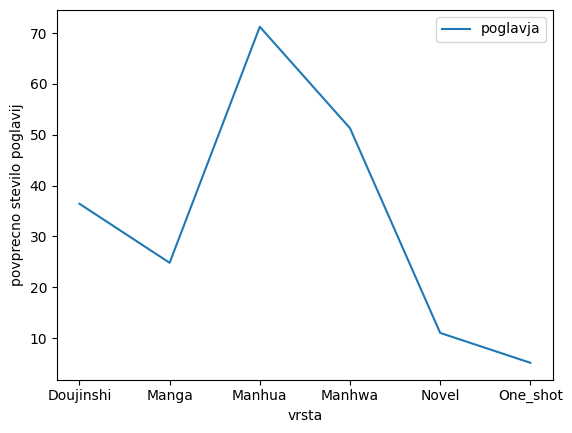

In [10]:
filter = sortirani_pravi[["vrsta", "poglavja"]]
filter.groupby("vrsta").mean().plot(ylabel = "povprecno stevilo poglavij")

Za konec si poglejmo se vsoto stevila poglavij tistih mang, ki so se zakljucile v istem letu.

<Axes: xlabel='datum'>

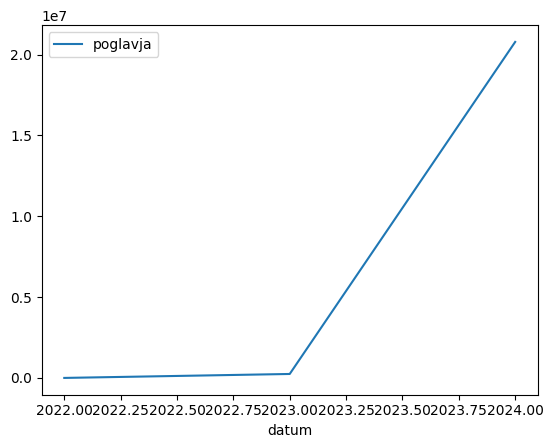

In [13]:
stripi[["datum", "poglavja"]].groupby("datum").sum().plot()